# Integration and Visualization of a Dynamic System
Author: W. F. Oquendo-Patiño, [william.oquendo@unisabana.edu.co](mail:woquendo@gmail.com)

Go to [https://nbviewer.jupyter.org/github/iluvatar1/numerical-visual-python/blob/master/visualization-integration.ipynb](https://nbviewer.jupyter.org/github/iluvatar1/numerical-visual-python/blob/master/visualization-integration.ipynb?flush_cache=true)

## Goals
* Learn how to easily visualize a 3D system by using vpython (Visual Python)
* Learn how to integrate efficiently the equations of motion for a given dynamical system.
* Explore some simple examples: particle in a box, parabolic movement (maximum distance), viscous damping, particle inside magnetic field.

# Pre-requisites
- Python installed (you can use the [https://www.continuum.io/why-anaconda](https://www.continuum.io/why-anaconda) python distribution, although you can use any other tool, like the raw python, the Canopy distribution, Pythonxy, etc)
- Jupyter notebook installed (included in Ananconda and other distributions)
- Vpython installed. For anaconda, you can install vpython (to be used inside the notebook) by executing the following in the terminal
        pip install vpython
        conda install ipython jupyter notebook numpy matplotlib
- Open a jupyter-notebook to play with these codes.

# Introduction to VPython
VPython, [vpython.org](http://vpython.org), is an extension of the Python language aimed to help visualize 3D systems easily. The following is based on the Vpython_intro.pdf manual.

Let's create an sphere. 

**Note: to run any code inside this Jupyter notebook, you have to press shift+enter inside the cell**

## Creating an sphere

In [4]:
import vpython as vp
#import visual as vp
vp.sphere()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can also set several properties of the sphere, like color, positions, etc

It is useful to setup the display and visualization for future reference. We will also add arrows for the $x, y, z$ axes.

In [5]:
import vpython as vp
scene = vp.canvas(title="3D scene")
# add ball and wall
ball = vp.sphere(pos=vp.vector(-5,0,0), radius=0.5, color=vp.color.cyan) 
wallR = vp.box(pos=vp.vector(6,0,0), size=vp.vector(0.2,12,12), color=vp.color.green)

<IPython.core.display.Javascript object>

The following shows a complete example of an animation of a particle bouncing against several walls. The integration method is based on the Euler algorithm, and needs to be foxed (is unstable) for more complex situations (This will be done in the next section).

In [6]:
import vpython as vp
vp.scene.autoscale = False
scene = vp.canvas(title='3D scene')
ball = vp.sphere(pos=vp.vector(-5,0,0), radius=0.5, color=vp.color.cyan) 
wallR = vp.box(pos=vp.vector(+6,0,0), size=vp.vector(0.2,12,12), color=vp.color.green) 
wallL = vp.box(pos=vp.vector(-6,0,0), size=vp.vector(0.2,12,12), color=vp.color.green) 
ball.velocity = vp.vector(25,0,0)
deltat = 0.005
vscale = 0.1
varr = vp.arrow(pos=ball.pos, axis=vscale*ball.velocity, color=vp.color.yellow)
t=0
while t < 3:
    vp.rate(100)
    if ball.pos.x > wallR.pos.x or ball.pos.x < wallL.pos.x:
        ball.velocity.x = -ball.velocity.x
    ball.pos = ball.pos + ball.velocity*deltat
    varr.pos = ball.pos; varr.axis=vscale*ball.velocity
    t = t + deltat


<IPython.core.display.Javascript object>

# Integration of Dynamical Systems
The time evolution for a dynamical system is typically expressed in terms of differential equations relating the change in the state of the system. This has its roots on the Newton second law of movement (for constant mass), 
$$\vec F_{net} = m\vec A = m \frac{d^2x}{dt^2}$$ 
where $\vec F_{net} = \sum F_i$ is the net force (sum of all forces acting on the body), $m$ is its mass, and $\vec A$ its acceleration. Since the acceleration is the second derivative of the position (or the first derivative of the velocity), then differential equations of second (first) order are expected for the position (velocity). 

Now, the question is: How to compute the position or velocity as functions of time, given a set of forces acting on a body? For some cases, solutions can be found theoretically. But many cases cannot be solved closely and require a numerical procedure. Typically, time is split in small time-steps of size $\delta t$, and people tend to apply numerical methods like Runge-Kutta to integrate differential equations and obtain position or velocity at each time step. This is okay for few particles. But, when you have a large system with many interacting particles, Runge-Kutta can be computationally costly since it requires calling the force computation routine several times per time step, with no important increase in precision. There are better approaches for many particles systems, like using Verlet or Leap-Frog integration algorithms. In the following, we will explore the leap-frog algorithm. 


# Leap-frog algorithm
First, let's expand the position around $t + \delta t$, 

$$\vec R(t + \delta t) = \vec R(t) + \delta t \vec V(t) + \delta t^2 \vec A(t)/2 + O(\delta t^3), $$

but, from the previous, one can expand around $t + \delta t/2$ as

$$\vec R(t + \delta t) = \vec R(t + \delta t/2 + \delta t/2) = \vec R(t + \delta t/2) + \delta t \vec V(t + \delta t/2)/2 + (\delta t/2)^2 \vec A(t + \delta t/2)/2 + O(\delta t^3). $$

Also, 

$$\vec R(t) = \vec R(t + \delta t/2 - \delta t/2) = \vec R(t + \delta t/2) - \delta t \vec V(t + \delta t/2)/2 + (\delta t/2)^2 \vec A(t + \delta t/2)/2 + O(\delta t^3). $$

Finally, by substrating the last two equation and re-grouping,

$$\vec R(t + \delta t) = \vec R(t) + \delta t \vec V(t + \delta t/2) + O(\delta t^3), $$
$$\vec V(t + \delta t/2) = \vec V(t - \delta t/2) + \delta t \vec A(t) + O(\delta t^3). $$

This are the expression for the Leap-Frog method. As you can see, you need first to compute $V(t + \delta t/2)$ to later computer $R(t + \delta t)$. This algorithm, given the positions, velocities and Forces (accelerations) at time $t$, allows you to compute the next position and velocities at time-step $t+\delta t$ and $t + \delta t/2$, respectively.

---
**NOTE**: What happens when moving from $t = 0$ to $t = 0 + \delta t$ (first time step)?. At the beginning of the simulation, you have $\vec R(0)$, $\vec V(0)$ and $\vec A(0)$. But, for the first time step, the Leap-Frog equations give

$$\vec V(0 + \delta t/2) = \vec V(0 - \delta t/2) + \delta t \vec A(0),$$
$$\vec R(0 + \delta t) = \vec R(0) + \delta t \vec V(0 + \delta t/2).$$

So you need the velocity at time $t = -\delta t/2$, not at time $t = 0$. This implies that the method is not "self-started", and you need first to change the velocity from its initial value to

$$\vec V(-\delta t/2) = \vec V(0) - \delta t\vec A(0)/2.$$


## Particle falling under constant gravity
In this part we will use the Leap-Frog method to compute the positions and velocities of a particle falling under gravity. This is a useful test case since we know already the solution to the problem for constant gravity acceleration $\vec G$: 

$$\vec R(t) = \vec R(0) + t\vec V(0) + \frac{dt^2}{2}\vec G$$

We will obtain this solution numerically just by using the Leap-Frog algorithm. The following example implements all of this.

In [1]:
#%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import vpython as vp

# constants
G = np.array([0.0, -9.81, 0.0]) # m/s^2
MASS = 1.23 # Kg
R0 = np.array([2.0, 5.43, 0.0]) # m
V0 = np.array([0.0, 9.265, 0.0]) # m/s
DT = 0.5
T = np.arange(0.0, 2.5, DT)
NSTEPS = T.size

# start leapfrog
def start_integration(V, F, mass, dt):
    return V - 0.5*dt*F/mass

# evolve through leapfrog
def integration(R, V, F, mass, dt):
    Vnew = V + dt*F/mass
    Rnew = R + dt*Vnew
    return Rnew, Vnew

# compute net force
def force(R, V, mass):
    return mass*G

# visualization stuff
scene = vp.canvas(title='3D scene', center = vp.vector(1, 3, 2))
scene.autoscale = False
ball = vp.sphere(pos=vp.vector(R0[0], R0[1], R0[2]), radius=0.4, color=vp.color.cyan) 
ball.velocity = vp.vector(0,0,0)
wallB = vp.box(pos=vp.vector(0,0,0), size=vp.vector(8,0.4,-8), color=vp.color.green) 
vscale = 0.2
varr = vp.arrow(pos=ball.pos, axis=vscale*ball.velocity, color=vp.color.yellow)

# initial conditions
Y = np.zeros(NSTEPS); VY = np.zeros(NSTEPS) # To save only Y coordinates, as function of time
Y[0] = R0[1]; VY[0] = V0[1]
R = R0; V = V0 ; F = force(R, V, MASS) # Value which changes at each time step
V = start_integration(V, F, MASS, DT) # Move Velocity from 0 to -dt/2

# main evolution loop
it = 1
while it < NSTEPS:
    F = force(R, V, MASS)
    R, V = integration(R, V, F, MASS, DT)
    Y[it] = R[1]; VY[it] = V[1]
    # visual stuff
    vp.rate(100)
    ball.pos = vp.vector(R[0], R[1], R[2]); ball.velocity = vp.vector(V[0], V[1], V[2]); 
    varr.pos = ball.pos; varr.axis=vscale*ball.velocity
    # advance time
    it = it + 1

# plot final trayectorie together with theoretical one
plt.plot(T, Y, 'o', label="R-lf")
plt.plot(T, R0[1] + V0[1]*T + 0.5*T*T*G[1], '-', label="Exact", lw=3)
plt.legend()
plt.xlabel(r"$t(s)$", fontsize=23)
plt.ylabel(r"$y(m)$", fontsize=23)
plt.savefig("tmp.pdf")
#plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Homework:
* Compute the exact initial velocity for the ball to touch the ground, at time $t = 2.5$. Put it inside the code. Is it true that the ball just touches the ground at that time? explain
* Compute the difference percentage between the theoretical and the numerical result. How does it decrease with $\delta t$? Make a plot of the percentage of cumulated error, $\Delta E = \sum_{i} |theo_i - num_i|/|theo_i|$ ($i$ denotes the time step) as function of $\delta t$. What should be the value of $\delta t$ to get an error less or equal than 1 %?
* Add a line to make the particle bounce on the floor. Check.
* Plot the velocity as function of time. Is the value as expected? compare woith the theory.

## Particle inside magnetic field
In this case, the force is equal to 

$$\vec F = q \vec V\times \vec B ,$$
where $\vec B$ is the magnetic field. In this case we just need to set the value for $\vec B$ and the force routine. What we expect is that the particle will follow a circular path.

In [8]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
#import matplotlib.pyplot as plt
import vpython as vp

# constants
B = (0, 0, 3.0)
MASS = 1.23 # Kg
Q = 1.2 
R0 = np.array([2.0, 2.0, 0.0]) # m
V0 = np.array([0.0, 9.265, 0.0]) # m/s
DT = 0.001
T = np.arange(0.0, 8.5, DT)
NSTEPS = T.size

# start leapfrog
def start_integration(V, F, mass, dt):
    return V - 0.5*dt*dt*F/mass

# evolve through leapfrog
def integration(R, V, F, mass, dt):
    Vnew = V + dt*F/mass
    Rnew = R + dt*Vnew
    return Rnew, Vnew

# compute net force
def force(R, V, mass):
    return Q*np.cross(V, B)

# visualization stuff
scene = vp.canvas(title='3D scene', center = vp.vector(4, 2, 2))
scene.autoscale = False
ball = vp.sphere(pos=vp.vector(R0[0], R0[1], R0[2]), radius=0.4, color=vp.color.cyan) 
ball.velocity = vp.vector(0,0,0)
vscale = 0.2
varr = vp.arrow(pos=ball.pos, axis=vscale*ball.velocity, color=vp.color.yellow)
ball.trail = vp.curve(color=ball.color)

# initial conditions
Y = np.zeros(NSTEPS); VY = np.zeros(NSTEPS) # To save only Y coordinates, as function of time
Y[0] = R0[1]; VY[0] = V0[1]
R = R0; V = V0 ; F = force(R, V, MASS) # Value which changes at each time step
V = start_integration(V, F, MASS, DT) # Move Velocity from 0 to -dt/2

# main evolution loop
it = 1
while it < NSTEPS:
    F = force(R, V, MASS)
    R, V = integration(R, V, F, MASS, DT)
    Y[it] = R[1]; VY[it] = V[1]
    # visual stuff
    vp.rate(400)
    ball.pos = vp.vector(R[0], R[1], R[2]); ball.velocity = vp.vector(V[0], V[1], V[2]); 
    varr.pos = ball.pos; varr.axis=vscale*ball.velocity
    ball.trail.append(pos=ball.pos)
    # advance time
    it = it + 1


<IPython.core.display.Javascript object>

### Homework
* Compute the radius of the trajectory. Compare with the theoretical value.
* After 5 cycles, is the radius still constant? plot the radius after 5 cycles as function of $\delta t$. Then give the maximum $\delta t$ to assure an error less than 1%. 

## Particle with viscous non-linear damping

In this case we will add a viscous non-linear damping of the form

$$f_{visc} = -b v^2.$$

The general solution for the position cannot be obtained easily, but we can solve numerically the system as before and obtain the approximate behavior. To calibrate the method, we can explore the final value of the limit velocity: The total force for this system is 

$$\vec F_{net} = m\vec g - b\, \text{sign}(\vec V)|\vec V|^2$$

The limit steady velocity is obtained when the acceleration is null. Therefore, for a one-dimensional problem on the $y$ axis we have

$$V_{lim} = \sqrt{\frac{mg}{b}}$$

So, a plot of $V_{lim}$ versus $b$ should be a power law with exponent 1/2. We will use the previous to verify this numerically.

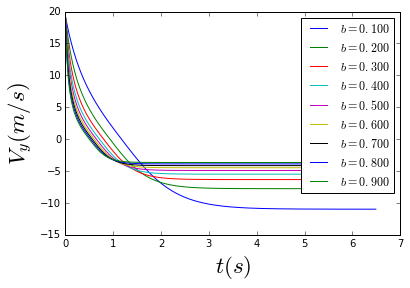

[-10.98314198  -7.76732494  -6.34200262  -5.49233556  -4.91249427
  -4.48447321  -4.15181544  -3.88366773  -3.66155705]


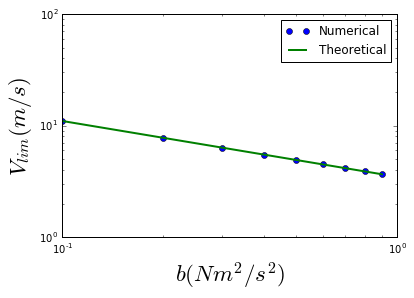

In [11]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

# constants
G = np.array([0.0, -9.81, 0.0]) # m/s^2
MASS = 1.23 # Kg
B = 0.1 # N s^2/m^2
R0 = np.array([2.0, 5.43, 0.0]) # m
V0 = np.array([0.0, 19.265, 0.0]) # m/s
DT = 0.01
T = np.arange(0.0, 6.5, DT)
NSTEPS = T.size

# start leapfrog
def start_integration(V, F, mass, dt):
    return V - 0.5*dt*dt*F/mass

# evolve through leapfrog
def integration(R, V, F, mass, dt):
    Vnew = V + dt*F/mass
    Rnew = R + dt*Vnew
    return Rnew, Vnew

# compute net force
def force(R, V, mass, b):
    return mass*G - b*np.sign(V)*V*V # VERY SIMPLE CHANGE, everything else is the same

def evolve(b):
    # initial conditions
    Y = np.zeros(NSTEPS); VY = np.zeros(NSTEPS) # To save only Y coordinates, as function of time
    Y[0] = R0[1]; VY[0] = V0[1]
    R = R0; V = V0 ; F = force(R, V, MASS, b) # Value which changes at each time step
    V = start_integration(V, F, MASS, DT) # Move Velocity from 0 to -dt/2

    # main evolution loop
    it = 1
    while it < NSTEPS:
        F = force(R, V, MASS, b)
        R, V = integration(R, V, F, MASS, DT)
        Y[it] = R[1]; VY[it] = V[1]
        # advance time
        it = it + 1
    # plot final trayectorie together with theoretical one
    plt.plot(T, VY, '-', label=r"$b = {0:5.3f}$".format(b))    
    # return the latest velocity
    return V[1]

B = np.linspace(0.1, 0.9, 9)
Vlim = np.zeros_like(B)
ii = 0
for b in B:
    Vlim[ii] = evolve(b)
    ii = ii +1
plt.legend()
plt.xlabel(r"$t(s)$", fontsize=23)
plt.ylabel(r"$V_y(m/s)$", fontsize=23)
plt.savefig("tmp.pdf")
plt.show()
print(Vlim)
plt.loglog(B, -1*Vlim, 'o', label='Numerical')
plt.loglog(B, np.sqrt(-MASS*G[1]/B), '-', label="Theoretical", lw=2)
plt.xlabel(r"$b (Nm^2/s^2)$", fontsize=23)
plt.ylabel(r"$V_{lim} (m/s)$", fontsize=23)
plt.legend()
plt.show()